In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir


'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/44079668_34dfee3da1_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4814106562_7c3564d2d9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15072973261_73e2912ef2_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9448615838_04078d09bf_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2729206569_9dd2b5a3ed.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('datasets/flower_photos/roses/9160289562_ab2718d19b.jpg'),
 PosixPath('datasets/flower_photos/roses/4575042086_7674b76297_n.jpg')]

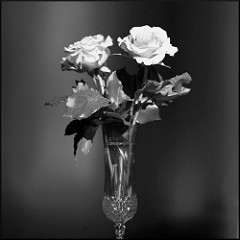

In [ ]:
PIL.Image.open(str(roses[1]))

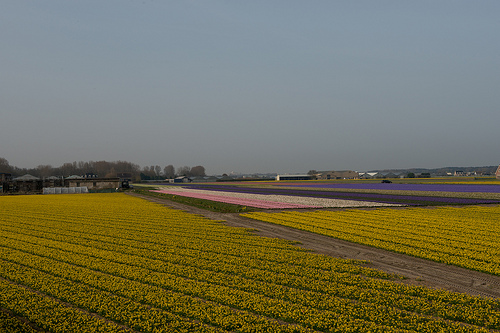

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]


[PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('datasets/flower_photos/roses/9160289562_ab2718d19b.jpg'),
 PosixPath('datasets/flower_photos/roses/4575042086_7674b76297_n.jpg')]

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(338, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 [==============================] - 14s 23ms/step - loss: 1.2975 - accuracy: 0.4735
Epoch 2/20
86/86 [==============================] - 2s 23ms/step - loss: 0.9754 - accuracy: 0.6290
Epoch 3/20
86/86 [==============================] - 2s 22ms/step - loss: 0.7842 - accuracy: 0.6999
Epoch 4/20
86/86 [==============================] - 2s 22ms/step - loss: 0.5946 - accuracy: 0.7845
Epoch 5/20
86/86 [==============================] - 2s 23ms/step - loss: 0.3680 - accuracy: 0.8732
Epoch 6/20
86/86 [==============================] - 2s 22ms/step - loss: 0.2151 - accuracy: 0.9299
Epoch 7/20
86/86 [==============================] - 2s 23ms/step - loss: 0.1180 - accuracy: 0.9655
Epoch 8/20
86/86 [==============================] - 2s 23ms/step - loss: 0.0918 - accuracy: 0.9720
Epoch 9/20
86/86 [==============================] - 2s 23ms/step - loss: 0.0335 - accuracy: 0.9931
Epoch 10/20
86/86 [==============================] - 2s 23ms/step - loss: 0.0221 - accuracy: 0.9960
Epoch 11

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 3.2818 - accuracy: 0.6253


[3.281838893890381, 0.6252723336219788]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[  4.6956167 ,   8.509907  ,   0.42432672,   0.5149654 ,
          0.43386918],
       [ 16.62166   ,  -2.0855496 , -11.01423   ,  -2.8498137 ,
         16.562744  ],
       [ -2.5831373 ,  13.207198  ,  17.359957  ,  -9.111221  ,
         -5.533761  ],
       ...,
       [ -8.011068  ,  -4.3727484 ,   0.39538676,  12.825832  ,
          8.254315  ],
       [ -1.8980365 ,   4.1529274 ,   8.106487  ,  -7.4153037 ,
         -4.9443817 ],
       [  1.7177234 , -10.531249  ,  -1.3763661 ,   8.38641   ,
         -0.6107976 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

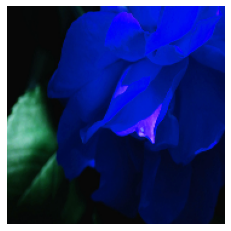

In [ ]:
plt.axis('off')
plt.imshow(X[0])

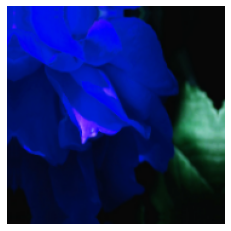

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 4s 26ms/step - loss: 1.3194 - accuracy: 0.4360
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 1.0657 - accuracy: 0.5861
Epoch 3/30
86/86 [==============================] - 2s 25ms/step - loss: 0.9575 - accuracy: 0.6214
Epoch 4/30
86/86 [==============================] - 2s 25ms/step - loss: 0.9158 - accuracy: 0.6493
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.8384 - accuracy: 0.6842
Epoch 6/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7906 - accuracy: 0.7013
Epoch 7/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7701 - accuracy: 0.7104
Epoch 8/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7303 - accuracy: 0.7271
Epoch 9/30
86/86 [==============================] - 2s 25ms/step - loss: 0.6995 - accuracy: 0.7297
Epoch 10/30
86/86 [==============================] - 2s 25ms/step - loss: 0.6837 - accuracy: 0.7402
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 20ms/step - loss: 0.8327 - accuracy: 0.7320


[0.8326666951179504, 0.7320261597633362]